In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Восстановление золота из руды

Требуется подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки.

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.


In [ ]:
## Подготовка данных

In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from numpy.random import RandomState
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.tree import DecisionTreeRegressor

### Изучение файлов

In [ ]:
data_train = pd.read_csv('/content/drive/MyDrive/gold_industry_train.csv')
data_full = pd.read_csv('/content/drive/MyDrive/gold_industry_full.csv')
data_test = pd.read_csv('/content/drive/MyDrive/gold_industry_test.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
data_train.info()
data_train.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14579 entries, 0 to 14578
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14579 non-null  object 
 1   rougher.input.feed_au                               14579 non-null  float64
 2   rougher.input.feed_ag                               14579 non-null  float64
 3   rougher.input.feed_pb                               14507 non-null  float64
 4   rougher.input.feed_sol                              14502 non-null  float64
 5   rougher.input.feed_rate                             14572 non-null  float64
 6   rougher.input.feed_size                             14478 non-null  float64
 7   rougher.input.floatbank10_sulfate                   14548 non-null  float64
 8   rougher.input.floatbank10_xanthate                  14572 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
14574,2017-12-09 09:59:59,4.599524,5.822083,4.255546,37.480479,559.895089,85.247019,6.775864,9.005425,1200.454685,-300.012582,1150.627632,-500.007240,1052.213299,-499.814928,947.090150,-499.963329,850.209399,-499.970349,850.139876,-498.721100,6.775291,9.000862,48310.254419,2524.316705,2524.130891,1.080830,18.162221,11.351051,11.247837,29.858813,87.684717,0.728133,4.116153,0.618130,16.383667,125.423263,8.014263,6.5,1.338973,1648.628464,-400.254719,1649.423778,-399.892993,1648.461910,-400.079787,1649.980440,-399.801181,33.493651,6.372520,12.879280,7.756028,2.581269,22.974292,6.868943,4.315335,35.096512,-501.110562,29.933276,-500.291576,25.996427,-500.158269,23.033562,-499.972253,23.030949,-501.196721,20.034440,-499.842047,18.001504,-499.872052,12.998309,-500.027809,20.007108,-500.850685,0.0,0.0,0.0,0.0,47.765393,2.925574,10.855586,7.053796,64.054699,1.761994,8.578502,3.365823,10.603464
14575,2017-12-09 10:59:59,4.658125,5.844800,4.241564,37.395565,561.464855,83.860651,6.770561,9.000889,1200.958146,-300.013649,1149.862859,-499.856868,1049.476804,-500.085763,9

In [ ]:
data_test.info()
data_test.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4860 entries, 0 to 4859
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        4860 non-null   object 
 1   rougher.input.feed_au                       4860 non-null   float64
 2   rougher.input.feed_ag                       4860 non-null   float64
 3   rougher.input.feed_pb                       4832 non-null   float64
 4   rougher.input.feed_sol                      4838 non-null   float64
 5   rougher.input.feed_rate                     4856 non-null   float64
 6   rougher.input.feed_size                     4816 non-null   float64
 7   rougher.input.floatbank10_sulfate           4857 non-null   float64
 8   rougher.input.floatbank10_xanthate          4859 non-null   float64
 9   rougher.state.floatbank10_a_air             4859 non-null   float64
 10  rougher.stat

,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
4855,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,1600.278420,-450.107091,1599.737339,-448.396498,1598.207230,-450.370000,1396.848252,-458.073441,1397.977965,-442.705181,14.676690,6.903515,150.944211,12.516814,7.25,1.005121,1599.713324,-500.811273,1596.499220,-499.189257,1599.635875,-500.178569,1598.888237,-499.112223,26.008972,-500.410938,24.075851,-499.647030,23.969678,-500.207930,23.978896,-499.862885,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365
4856,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,1600.585419,-450.871865,1600.054220,-451.892850,1604.245003,-450.784204,1397.507497,-452.207181,1398.025205,-451.184768,14.838200,6.894752,147.591165,12.517364,7.25,0.959430,1602.999120,-500.526448,1597.866105,-499.798253,1598.796914,-498.214347,1597.075286,-499.158291,26.019475,-499.818693,23.991310,-500.888315,24.026801,-499.856287,23.959707,-500.428539,14.031220,-503.471307,11.966426,-500.656842,10.051620,-498.318772,8.018091,-499.696138,13.958937,-599.213013
4857,2018-08-18 08:59:59,6.627458,6.015149,2.466127,39.841423,563.733146,61.287347,13.723692,6.700148,1000.014718,-400.320877,1600.572169,-449.351989,1601.079206,-450.846324,1597.862670,-449.053827,1400.353257,-448.866374,1399.930779,-449.388880,13.716111,6.703495,144.447728,12.499446,7.25,0.904020,1596.610313,-499.416573,1597.325921,-499.944194,1601.441880,-499.658913,1599.758645,-501.149616,25.953364,-501.033038,24.039465,-500.088979,24.010117,-499.705384,24.024501,-499.466383,13.996317,-502.995300,11.980055,-500.607751,9.964501,-499.261719,8.065048,-499.492395,13.997801,-600.621416
4858,2018-08-18 09:59:59,6.702243,6.097592,2.278955,37.728375,549.812490,59.637037,13.746510,6.706417,999.635748,-399.484884,1599.852212,-449.448826,1599.325946,-448.812166,1614.612892,-449.774665,1401.626496,-447.607440,1400.158685,-448.035466,13.758277,6.702969,147.944885,12.481529,7.25,0.893913,1603.053015,-499.728573,1600.537532,-500.0960

In [ ]:
data_full.info()
data_full.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   rougher.input.feed_au                               19439 non-null  float64
 2   rougher.input.feed_ag                               19439 non-null  float64
 3   rougher.input.feed_pb                               19339 non-null  float64
 4   rougher.input.feed_sol                              19340 non-null  float64
 5   rougher.input.feed_rate                             19428 non-null  float64
 6   rougher.input.feed_size                             19294 non-null  float64
 7   rougher.input.floatbank10_sulfate                   19405 non-null  float64
 8   rougher.input.floatbank10_xanthate                  19431 non-null  float64


,date,rougher.input.feed_au,rougher.input.feed_ag,rougher.input.feed_pb,rougher.input.feed_sol,rougher.input.feed_rate,rougher.input.feed_size,rougher.input.floatbank10_sulfate,rougher.input.floatbank10_xanthate,rougher.state.floatbank10_a_air,rougher.state.floatbank10_a_level,rougher.state.floatbank10_b_air,rougher.state.floatbank10_b_level,rougher.state.floatbank10_c_air,rougher.state.floatbank10_c_level,rougher.state.floatbank10_d_air,rougher.state.floatbank10_d_level,rougher.state.floatbank10_e_air,rougher.state.floatbank10_e_level,rougher.state.floatbank10_f_air,rougher.state.floatbank10_f_level,rougher.input.floatbank11_sulfate,rougher.input.floatbank11_xanthate,rougher.calculation.sulfate_to_au_concentrate,rougher.calculation.floatbank10_sulfate_to_au_feed,rougher.calculation.floatbank11_sulfate_to_au_feed,rougher.calculation.au_pb_ratio,rougher.output.concentrate_au,rougher.output.concentrate_ag,rougher.output.concentrate_pb,rougher.output.concentrate_sol,rougher.output.recovery,rougher.output.tail_au,rougher.output.tail_ag,rougher.output.tail_pb,rougher.output.tail_sol,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,primary_cleaner.state.floatbank8_d_air,primary_cleaner.state.floatbank8_d_level,primary_cleaner.output.concentrate_au,primary_cleaner.output.concentrate_ag,primary_cleaner.output.concentrate_pb,primary_cleaner.output.concentrate_sol,primary_cleaner.output.tail_au,primary_cleaner.output.tail_ag,primary_cleaner.output.tail_pb,primary_cleaner.output.tail_sol,secondary_cleaner.state.floatbank2_a_air,secondary_cleaner.state.floatbank2_a_level,secondary_cleaner.state.floatbank2_b_air,secondary_cleaner.state.floatbank2_b_level,secondary_cleaner.state.floatbank3_a_air,secondary_cleaner.state.floatbank3_a_level,secondary_cleaner.state.floatbank3_b_air,secondary_cleaner.state.floatbank3_b_level,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,secondary_cleaner.output.tail_au,secondary_cleaner.output.tail_ag,secondary_cleaner.output.tail_pb,secondary_cleaner.output.tail_sol,final.output.concentrate_au,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.recovery,final.output.tail_au,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol
19434,2018-08-18 06:59:59,6.620245,5.992592,2.589242,39.934641,578.654582,63.473450,14.688804,6.898599,999.688257,-399.217124,1600.278420,-450.107091,1599.737339,-448.396498,1598.207230,-450.370000,1396.848252,-458.073441,1397.977965,-442.705181,14.676690,6.903515,42054.384954,3499.600613,3499.494045,2.556827,18.470301,11.039123,7.405501,25.960548,85.462226,1.387434,4.949871,0.754358,20.634540,150.944211,12.516814,7.25,1.005121,1599.713324,-500.811273,1596.499220,-499.189257,1599.635875,-500.178569,1598.888237,-499.112223,22.132642,5.775645,7.112666,12.377102,2.020822,15.316786,2.843019,7.608820,26.008972,-500.410938,24.075851,-499.647030,23.969678,-500.207930,23.978896,-499.862885,14.003057,-503.152258,12.016724,-501.136446,10.041864,-499.338844,8.007022,-500.279583,14.001271,-602.072365,2.073936,12.740218,4.460185,10.013738,42.435181,5.719113,10.621027,6.459561,68.786981,2.314786,10.286797,1.171459,19.131121
19435,2018-08-18 07:59:59,6.741324,6.158617,2.647185,40.176307,571.622005,62.815291,14.892720,6.903204,1000.479783,-399.574748,1600.585419,-450.8718

### Найдем MAE между нашими расчётами и значением признака

In [ ]:
def recovery(c, f, t):
    recovery = ((c*(f - t)) / (f*(c - t)))*100
    return recovery

In [ ]:
c = data_train['final.output.concentrate_au']
f = data_train['rougher.input.feed_au']
t = data_train['final.output.tail_au']
c1 = data_train['rougher.output.concentrate_au']
f1 = data_train['rougher.input.feed_au']
t1 = data_train['rougher.output.tail_au']

In [ ]:
recoveries_final = recovery(c, f, t)
recoveries_rougher = recovery(c1, f1, t1)
print('MAE final.output.recovery:', mean_absolute_error(data_train['final.output.recovery'], recoveries_final))
print('MAE rougher.output.recovery:', mean_absolute_error(data_train['rougher.output.recovery'], recoveries_rougher))

MAE final.output.recovery: 8.569602032360358e-15
MAE rougher.output.recovery: 9.83758577644259e-15


### Найдем признаки, недоступные в тестовой выборке

In [ ]:
data_train.shape[1] - data_test.shape[1]

34

In [ ]:
columns_drop = set(data_train.columns).difference(data_test.columns)
print(columns_drop, len(columns_drop))

{'primary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_au', 'primary_cleaner.output.tail_pb', 'rougher.output.tail_sol', 'final.output.tail_sol', 'primary_cleaner.output.tail_au', 'primary_cleaner.output.concentrate_sol', 'rougher.output.concentrate_ag', 'final.output.tail_au', 'final.output.recovery', 'final.output.concentrate_au', 'rougher.output.concentrate_pb', 'rougher.calculation.au_pb_ratio', 'rougher.calculation.floatbank10_sulfate_to_au_feed', 'rougher.output.tail_au', 'final.output.tail_ag', 'rougher.calculation.sulfate_to_au_concentrate', 'primary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_sol', 'secondary_cleaner.output.tail_ag', 'primary_cleaner.output.concentrate_pb', 'secondary_cleaner.output.tail_au', 'rougher.output.concentrate_sol', 'final.output.concentrate_sol', 'final.output.tail_pb', 'final.output.concentrate_ag', 'rougher.output.recovery', 'rougher.output.tail_pb', 'secondary_cleaner.output.tail_pb', 'rougher.output.tail_ag', 'primar

### Проведем предобработку данных.

In [ ]:
data_train.isnull().sum().sum(), data_test.isnull().sum().sum(), data_full.isnull().sum().sum()

(3050, 375, 4481)

In [ ]:
data_train.duplicated().sum(), data_test.duplicated().sum(), data_full.duplicated().sum()

(0, 0, 0)

In [ ]:
data_train = data_train.dropna()

## Анализ данных

### Рассмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки.

Для коцентрации рассматриваем входящее значение, флотацию, первичную этап, финальный вариант. Хвосты не рассматриваем так как это отработанный материал.

In [ ]:
conc_au = data_train[['rougher.input.feed_au', 'rougher.output.concentrate_au', 'primary_cleaner.output.concentrate_au', 'final.output.concentrate_au']]
conc_ag = data_train[['rougher.input.feed_ag', 'rougher.output.concentrate_ag', 'primary_cleaner.output.concentrate_ag', 'final.output.concentrate_ag']]
conc_pb = data_train[['rougher.input.feed_pb', 'rougher.output.concentrate_pb', 'primary_cleaner.output.concentrate_pb', 'final.output.concentrate_pb']]

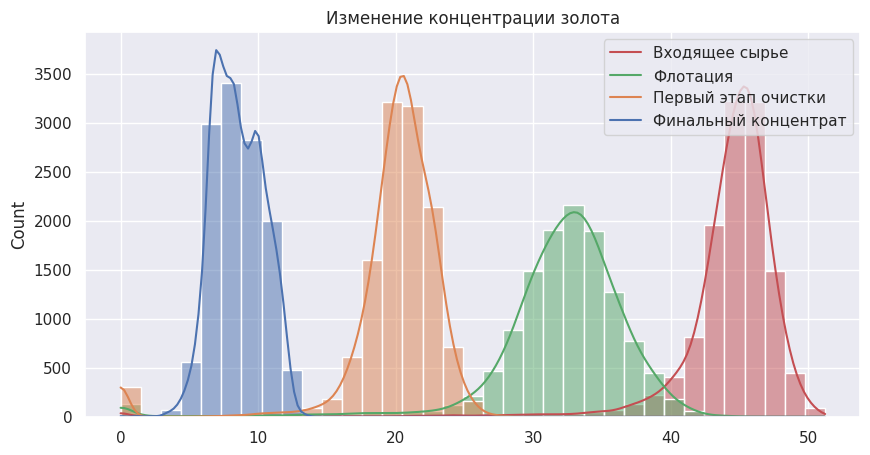

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(conc_au, kde = True).set(title = 'Изменение концентрации золота')
plt.legend(['Входящее сырье', 'Флотация', 'Первый этап очистки', 'Финальный концентрат']);

Концентрация золото постепенно повышается в процессе очистки, имея входящую коцентрацию около 8 у.е, при обогащении она растет в арифметической прогресси (~10). Стоит обратить на околонулевое начало графика первичной очистки, стоило бы избавиться от выбросов, но в новом обучающем датасете столбца не будет(ориентируемся на columns_to_drop) - выбросов по нему тоже

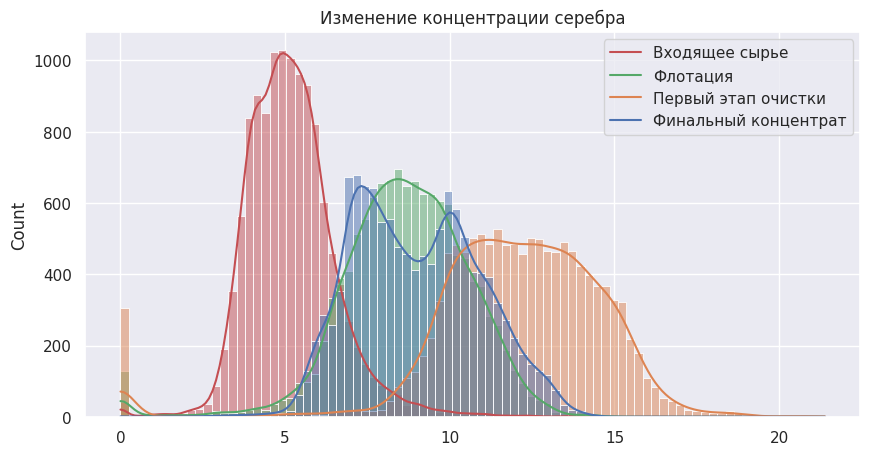

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(conc_ag, kde = True).set(title = 'Изменение концентрации серебра')
plt.legend(['Входящее сырье', 'Флотация', 'Первый этап очистки', 'Финальный концентрат']);

Концентрация серебра постепенно снижается, немного возрастая лишь при обогащении - флотации, имеются нулевые выбросы на первом этапе очистки.

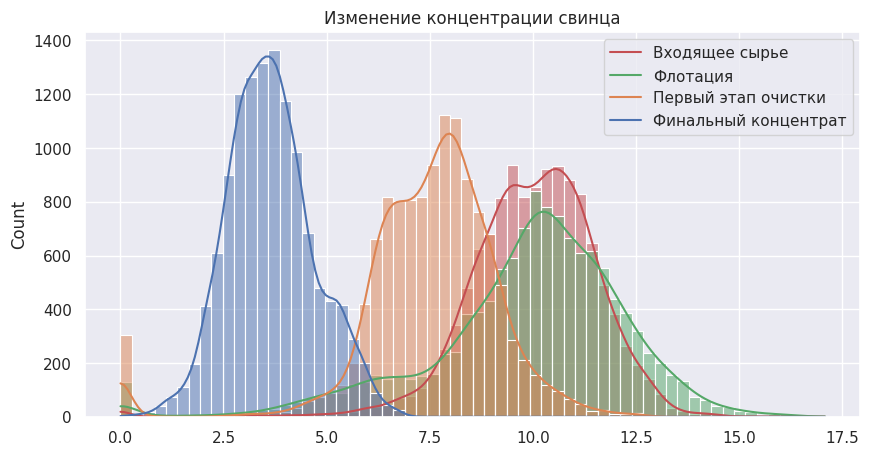

In [ ]:
plt.figure(figsize = (10, 5))
sns.histplot(conc_pb, kde = True).set(title = 'Изменение концентрации свинца')
plt.legend(['Входящее сырье', 'Флотация', 'Первый этап очистки', 'Финальный концентрат']);

Концентрация свинца сильно повышается после обогащения, но все равно остается в разы ниже чем золота, имеются нулевые выбросы на первом этапе очистки.

### Сравним распределения размеров гранул сырья на обучающей и тестовой выборках

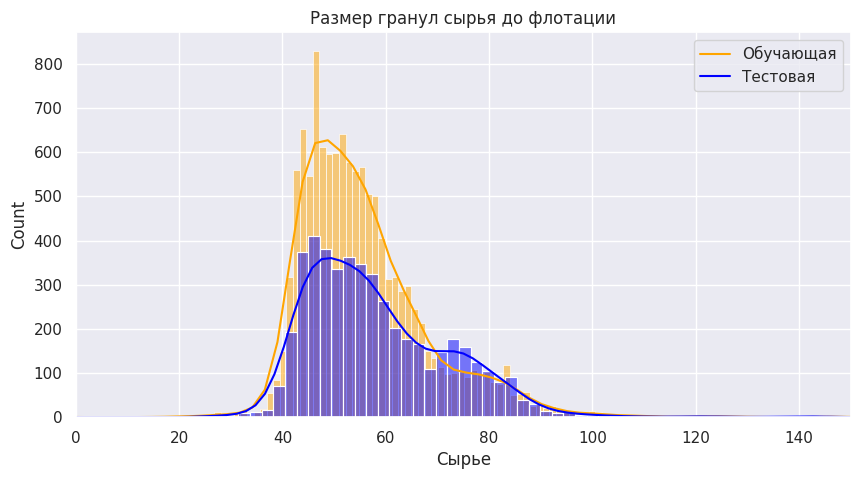

In [ ]:
plt.figure(figsize = (10, 5))
plt.xlim(0, 150)
sns.histplot(data_train['rougher.input.feed_size'], kde = True, color = 'orange')
sns.histplot(data_test['rougher.input.feed_size'], kde = True, color = 'blue')
plt.legend(["Обучающая", "Тестовая"])
plt.xlabel('Сырье')
plt.title('Размер гранул сырья до флотации');

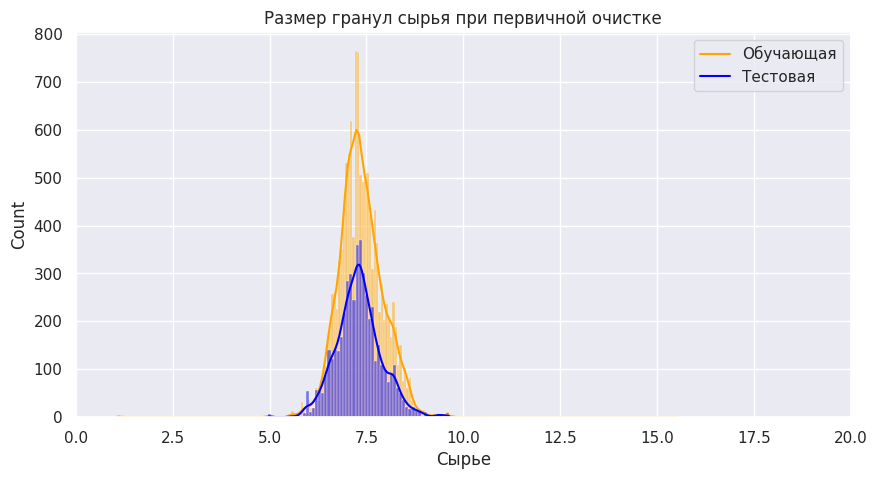

In [ ]:
plt.figure(figsize = (10, 5))
plt.xlim(0, 20)
sns.histplot(data_train['primary_cleaner.input.feed_size'], kde = True, color = 'orange')
sns.histplot(data_test['primary_cleaner.input.feed_size'], kde = True, color = 'blue')
plt.legend(["Обучающая", "Тестовая"])
plt.xlabel('Сырье')
plt.title('Размер гранул сырья при первичной очистке');

Средние значения немного смещены, но общая плотность схожа, при обучении модели явных ошибок не будет

### Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [ ]:
all_rougher_input_feed = (
    data_train['rougher.input.feed_au'] +
    data_train['rougher.input.feed_ag'] +
    data_train['rougher.input.feed_pb'] +
    data_train['rougher.input.feed_sol']
)

all_rougher_output_concentrate = (
    data_train['rougher.output.concentrate_au'] +
    data_train['rougher.output.concentrate_ag'] +
    data_train['rougher.output.concentrate_pb'] +
    data_train['rougher.output.concentrate_sol']
)

all_primary_cleaner_output_concentrate = (
    data_train['primary_cleaner.output.concentrate_au'] +
    data_train['primary_cleaner.output.concentrate_ag'] +
    data_train['primary_cleaner.output.concentrate_pb'] +
    data_train['primary_cleaner.output.concentrate_sol']
)

all_final_output_concentrate = (
    data_train['final.output.concentrate_au'] +
    data_train['final.output.concentrate_ag'] +
    data_train['final.output.concentrate_pb'] +
    data_train['final.output.concentrate_sol']
)

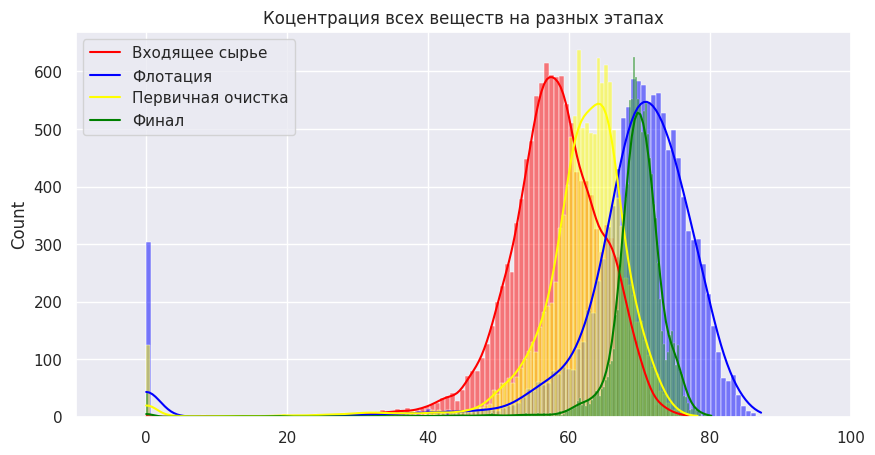

In [ ]:
plt.figure(figsize = (10, 5))
plt.xlim(-10, 100)
sns.histplot(all_rougher_input_feed, kde = True, color = 'red')
sns.histplot(all_rougher_output_concentrate, kde = True, color = 'blue')
sns.histplot(all_primary_cleaner_output_concentrate, kde = True, color = 'yellow')
sns.histplot(all_final_output_concentrate, kde = True, color = 'green')
plt.legend(["Входящее сырье", "Флотация", "Первичная очистка", "Финал"])
plt.title('Коцентрация всех веществ на разных этапах');

### Проведем дополнительную обработку данных по аномальным данным

In [ ]:
data_train_0 = data_train['rougher.input.feed_pb'].sort_values()
data_train_0.head(20)

12626    0.010000
12627    0.010000
12628    0.010000
2530     0.250715
2559     0.275738
11306    0.300816
2531     0.329152
984      0.358522
7309     0.389402
1482     0.410705
2529     0.434058
8990     0.445618
2695     0.529896
7308     0.536891
13422    0.554024
12625    0.565445
2522     0.592658
12690    0.613734
2558     0.648284
7310     0.716312
Name: rougher.input.feed_pb, dtype: float64

In [ ]:
data_train = data_train[(data_train['rougher.input.feed_au'] > 1) & (data_train['rougher.input.feed_ag'] >1) & (data_train['rougher.input.feed_pb'] >1)]
data_train = data_train[(data_train['rougher.output.concentrate_au'] > 1) & (data_train['rougher.output.concentrate_ag'] >1) & (data_train['rougher.output.concentrate_pb'] >1)]
data_train = data_train[(data_train['primary_cleaner.output.concentrate_au'] > 1) & (data_train['primary_cleaner.output.concentrate_ag'] >1) & (data_train['primary_cleaner.output.concentrate_pb'] >1)]
data_train = data_train[(data_train['final.output.concentrate_au'] > 1) & (data_train['final.output.concentrate_ag'] >1) & (data_train['final.output.concentrate_pb'] >1)]

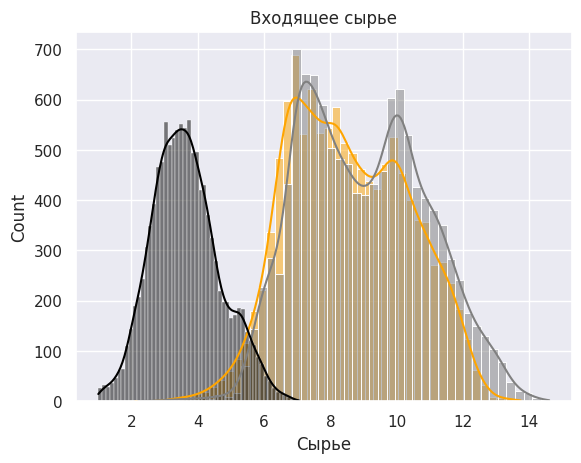

In [ ]:
sns.histplot(data_train['rougher.input.feed_au'], kde = True, color = 'orange')
sns.histplot(data_train['rougher.input.feed_ag'], kde = True, color = 'grey')
sns.histplot(data_train['rougher.input.feed_pb'], kde = True, color = 'black')
plt.xlabel('Сырье')
plt.title('Входящее сырье');

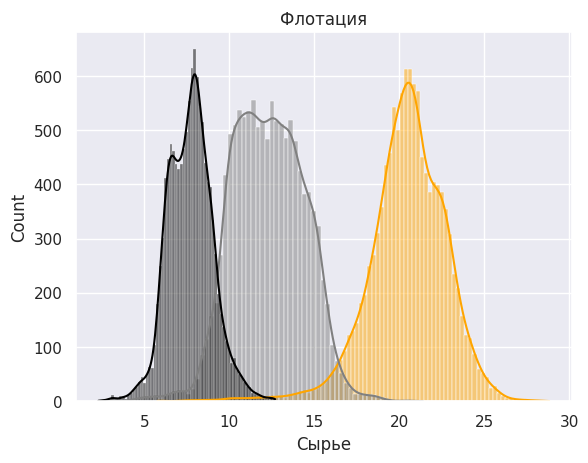

In [ ]:
sns.histplot(data_train['rougher.output.concentrate_au'], kde = True, color = 'orange')
sns.histplot(data_train['rougher.output.concentrate_ag'], kde = True, color = 'grey')
sns.histplot(data_train['rougher.output.concentrate_pb'], kde = True, color = 'black')
plt.xlabel('Сырье')
plt.title('Флотация');

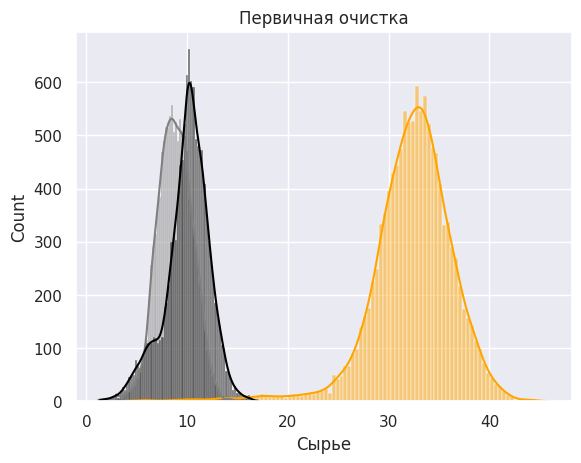

In [ ]:
sns.histplot(data_train['primary_cleaner.output.concentrate_au'], kde = True, color = 'orange')
sns.histplot(data_train['primary_cleaner.output.concentrate_ag'], kde = True, color = 'grey')
sns.histplot(data_train['primary_cleaner.output.concentrate_pb'], kde = True, color = 'black')
plt.xlabel('Сырье')
plt.title('Первичная очистка');

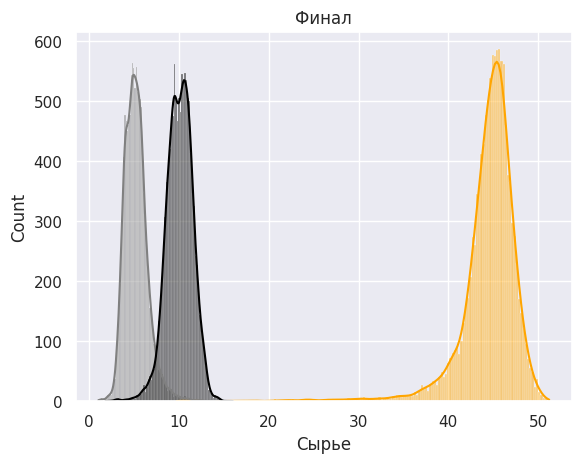

In [ ]:
sns.histplot(data_train['final.output.concentrate_au'], kde = True, color = 'orange')
sns.histplot(data_train['final.output.concentrate_ag'], kde = True, color = 'grey')
sns.histplot(data_train['final.output.concentrate_pb'], kde = True, color = 'black')
plt.xlabel('Сырье')
plt.title('Финал');

## Модель

### Напишем функцию для вычисления итоговой sMAPE.

In [ ]:
def smape(target, predictions):
    mape = abs(target - predictions)/(((abs(target) + abs(predictions))/2))
    summa = mape[:len(target)].sum()
    smape = (1/len(target)) * summa * 100
    return smape

def total_smape(smape_r, smape_f):
    return 0.25 * smape_r + 0.75 * smape_f

### Разделим данные на обучающую и тестовую выборки

In [ ]:
new_data_test = data_test.merge(data_full[['date', 'rougher.output.recovery', 'final.output.recovery']], on = 'date', how = 'left')

In [ ]:
new_data_test = new_data_test.dropna()

In [ ]:
features_test = new_data_test.drop(['date', 'rougher.output.recovery', 'final.output.recovery'], axis = 1)
target_test_rougher = new_data_test['rougher.output.recovery']
target_test_final = new_data_test['final.output.recovery']

In [ ]:
target_test_rougher.shape, target_test_final.shape, features_test.shape

((4537,), (4537,), (4537, 52))

In [ ]:
data_train = data_train.drop('date', axis =1)
features_train = data_train.drop(columns_drop, axis = 1)
target_train_rougher = data_train['rougher.output.recovery']
target_train_final = data_train['final.output.recovery']

In [ ]:
target_train_rougher.shape, target_train_final.shape, features_train.shape

((11805,), (11805,), (11805, 52))

### Обучим разные модели и оценим их качество кросс-валидацией.

In [ ]:
smape_score = make_scorer(smape, greater_is_better = False)

In [ ]:
tree_rougher = DecisionTreeRegressor(random_state = 88)
parametrs = {'max_depth' : range(1, 10, 1)}
grid = GridSearchCV(tree_rougher, parametrs, scoring = smape_score, cv=5, n_jobs=1)
grid.fit(features_train, target_train_rougher)
best_score = grid.best_score_
print(grid.best_estimator_)
print('SMAPE: ', abs(grid.best_score_))

DecisionTreeRegressor(max_depth=1, random_state=88)
SMAPE:  6.768332640666907


In [ ]:
tree_final = DecisionTreeRegressor(random_state = 88)
parametrs = {'max_depth' : range(1, 10, 1)}
grid = GridSearchCV(tree_final, parametrs, scoring = smape_score, cv=5, n_jobs=1)
grid.fit(features_train, target_train_final)
print(grid.best_estimator_)
print('SMAPE: ', abs(grid.best_score_))

DecisionTreeRegressor(max_depth=1, random_state=88)
SMAPE:  8.2496255720327


In [ ]:
forest_rougher = RandomForestRegressor(random_state = 88)
parametrs = {'max_depth' : range(2, 10, 2),
            'n_estimators' : range(5, 36, 10)}
grid = GridSearchCV(forest_rougher, parametrs, scoring = smape_score, cv=5, n_jobs=1)
grid.fit(features_train, target_train_rougher)
best_score = grid.best_score_
print(grid.best_estimator_)
print('SMAPE: ', abs(grid.best_score_))

RandomForestRegressor(max_depth=4, n_estimators=5, random_state=88)
SMAPE:  5.951618423698319


In [ ]:
forest_final = RandomForestRegressor(random_state = 88)
parametrs = {'max_depth' : range(2, 10, 2),
            'n_estimators' : range(5, 36, 10)}
grid = GridSearchCV(forest_final, parametrs, scoring = smape_score, cv=5, n_jobs=1)
grid.fit(features_train, target_train_final)
best_score = grid.best_score_
print('SMAPE: ', grid.best_estimator_)
print('SMAPE: ', abs(grid.best_score_))

SMAPE:  RandomForestRegressor(max_depth=2, n_estimators=25, random_state=88)
SMAPE:  8.041374706797942


In [ ]:
line_rougher = LinearRegression()
line_rougher.fit(features_train, target_train_rougher)
predictions = line_rougher.predict(features_test)
scores = cross_val_score(line_rougher, features_train, target_train_rougher, cv=5, scoring = smape_score)
final_score = sum(scores)/len(scores)
print('SMAPE: ', abs(final_score))

SMAPE:  6.779813303964085


In [ ]:
line_final = LinearRegression()
line_final.fit(features_train, target_train_final)
predictions = line_final.predict(features_test)
scores = cross_val_score(line_final, features_train, target_train_final, cv=5, scoring = smape_score)
final_score = sum(scores)/len(scores)
print('SMAPE: ', abs(final_score))

SMAPE:  9.15181232780159


Лучшая модель для обогащения чернового и финального концентрата по smape RandomForest

### Тестирование

In [ ]:
model_rougher = RandomForestRegressor(random_state = 88, max_depth = 4, n_estimators = 5)
model_rougher.fit(features_train, target_train_rougher)
predictions = model_rougher.predict(features_test)
smape_rougher = smape(target_test_rougher, predictions)
print('SMAPE: ', smape_rougher)

SMAPE:  3.906960888801302


In [ ]:
model_final = RandomForestRegressor(random_state = 88, max_depth = 2, n_estimators = 25)
model_final.fit(features_train, target_train_final)
predictions = model_final.predict(features_test)
smape_final = smape(target_test_final, predictions)
print('SMAPE: ', smape_final)

SMAPE:  8.315972553105883


In [ ]:
print('Итоговый SMAPE: ', total_smape(smape_rougher, smape_final))

Итоговый SMAPE:  7.213719637029738


In [ ]:
model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train_rougher)
predictions = model.predict(features_test)
r_smape = smape(target_test_rougher, predictions)
print(r_smape)

model = DummyRegressor(strategy="mean")
model.fit(features_train, target_train_final)
predictions = model.predict(features_test)
f_smape = smape(target_test_final, predictions)
print(f_smape)

print('Total_SMAPE: ', total_smape(r_smape, f_smape))

6.04797093987834
9.04192841527378
Total_SMAPE:  8.29343904642492


## Вывод

Был проведен предварительный анализ данных. Имеются пропуски в значениях объема воздуха, вводимых активаторах-реагентах, отвальных хвостах и т.д.

При анализе концентрация заметно что, концентрация золота быстро растет от этапа к этапу, серебра снижается, а свинца немного повышается после очистки и остается ровным до конца тех. процесса.

Были найдена аномальные значений концентраций (меньше 1 у.е), данные были очищены.

Рассмотрели и обучили несколько моделей для обогащения чернового концентрата и обогащения финального концентрата, нилучшими оказались модели случайного леса, при сравнении с константной моделью показали лучшие результаты. Итоговое smape = 7.2 удовлетворительно
